<a href="https://colab.research.google.com/github/tutidolce/Proyecto_futbol_Dolce/blob/main/Entrega%20final_Proyecto_futbol_%2BDolce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0 - Introducción

##### En base a un df de resultados de partidos del torneo Argentino desde el 2015 al 2022 se realiza el siguiente análisis, con el objetivo de poder conocer tendencias de los resultados según localías, equipos, como general, y de River Plate en particular.

### 1 - Configuración Inicial

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.multiclass import OneVsRestClassifier

In [5]:
url = 'https://raw.githubusercontent.com/tutidolce/Proyecto_futbol_Dolce/refs/heads/main/afa_2015_2022_spa.csv'

df_resultados = pd.read_csv(url)

### 2 - Exploración inicial de datos

In [6]:
## Visualizar las primeras cinco filas
df_resultados.head()

,torneo,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,...,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,Hora_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
0,Campeonato 2015,1,1,Velez,Aldosivi,2,0,NaN,NaN,NaN,...,8.725,1.790370,28.100000,0.233333,L,13/2/2015,18:00:00,1.75,5.01,3.37
1,Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,NaN,NaN,NaN,...,18.350,1.789333,25.608696,0.217391,V,13/2/2015,21:10:00,1.80,4.82,3.23
2,Campeonato 2015,1,3,San Lorenzo,Colon,2,0,NaN,NaN,NaN,...,12.125,1.801026,24.948718,0.282051,L,14/2/2015,17:00:00,1.70,5.55,3.34
3,Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,NaN,NaN,NaN,...,12.050,1.776889,25.460000,0.240000,V,14/2/2015,17:00:00,2.06,3.82,3.09
4,Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,NaN,NaN,NaN,...,11.250,1.780000,26.153846,0.205128,E,14/2/2015,19:15:00,2.03,3.82,3.15


In [7]:
## Visualizar información de las columnas
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   torneo                       2821 non-null   object 
 1   fecha                        2821 non-null   int64  
 2   partido                      2821 non-null   int64  
 3   equipo_local                 2821 non-null   object 
 4   equipo_visitante             2821 non-null   object 
 5   goles_local                  2821 non-null   int64  
 6   goles_visitante              2821 non-null   int64  
 7   posesion_local               1496 non-null   float64
 8   tiros_arco_local             1496 non-null   float64
 9   intentos_local               1496 non-null   float64
 10  faltas_local                 1496 non-null   float64
 11  tiro_esquina_local           1496 non-null   float64
 12  posesion_visitante           1496 non-null   float64
 13  tiros_arco_visitan

In [8]:
# Ver los tipos de datos de cada columna
print("Tipos de datos por columna (.dtypes):")
print(df_resultados.dtypes)

Tipos de datos por columna (.dtypes):
torneo                          object
fecha                            int64
partido                          int64
equipo_local                    object
equipo_visitante                object
goles_local                      int64
goles_visitante                  int64
posesion_local                 float64
tiros_arco_local               float64
intentos_local                 float64
faltas_local                   float64
tiro_esquina_local             float64
posesion_visitante             float64
tiros_arco_visitante           float64
intentos_visitante             float64
faltas_visitante               float64
tiro_esquina_visitante         float64
amarillas_local                float64
amarillas_visitante            float64
rojas_local                    float64
rojas_visitante                float64
valor_mercado_local            float64
altura_media_local             float64
edad_media_local               float64
proporcion_zurdos_local   

###3 - Análisis básico de datos

In [9]:
##Conteo general de resultados según localía
Conteo_resultados = df_resultados['resultado'].value_counts()
print(Conteo_resultados)

resultado
L    1236
E     823
V     762
Name: count, dtype: int64


In [10]:
##Porcentaje de cada resultado
Porcentaje_resultados = df_resultados['resultado'].value_counts(normalize=True) * 100
print(Porcentaje_resultados)

resultado
L    43.814250
E    29.174052
V    27.011698
Name: proportion, dtype: float64


In [11]:
## Análisis temporal

#Victorias locales, empates y visitantes por año

df_resultados['fecha_encuentro'] = pd.to_datetime(df_resultados['fecha_encuentro'])
df_resultados['año'] = df_resultados['fecha_encuentro'].dt.year
resultados_por_año=df_resultados.groupby('año')['resultado'].value_counts()
print(resultados_por_año)

año     resultado
2015.0  L            188
        E            140
        V            120
2016.0  L            206
        E            134
        V            110
2017.0  L            184
        V            126
        E             96
2018.0  L            179
        E            120
        V            100
2019.0  L            138
        V             97
        E             93
2020.0  L             34
        E             28
        V             23
2021.0  L            143
        E             96
        V             86
2022.0  L            164
        E            115
        V             98
Name: count, dtype: int64


/tmp/ipython-input-1095118482.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_resultados['fecha_encuentro'] = pd.to_datetime(df_resultados['fecha_encuentro'])


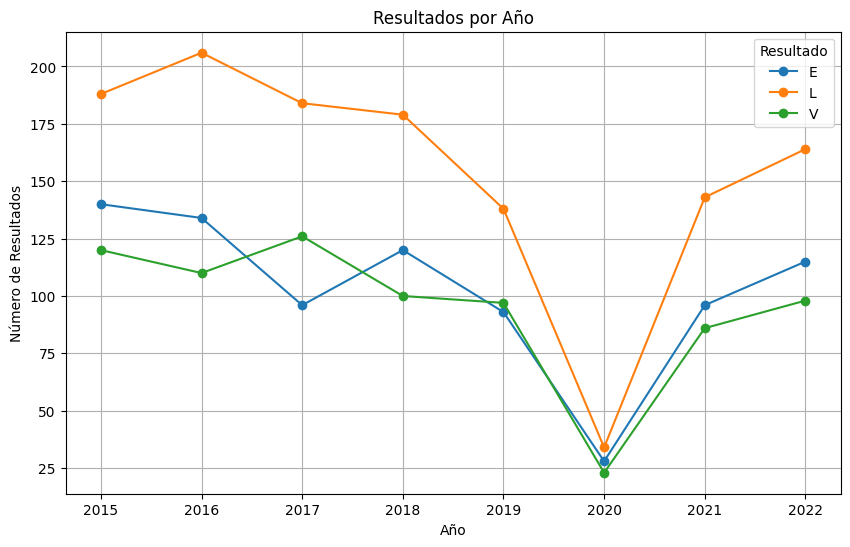

In [12]:
df_resultados['fecha_encuentro'] = pd.to_datetime(df_resultados['fecha_encuentro'])
df_resultados['año'] = df_resultados['fecha_encuentro'].dt.year

resultados_por_año = df_resultados.groupby('año')['resultado'].value_counts().unstack().fillna(0)

# Creación de gráfico de líneas
resultados_por_año.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Resultados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Resultados')
plt.legend(title='Resultado')
plt.grid(True)
plt.show()

## 4 - Análisis específico de River Plate

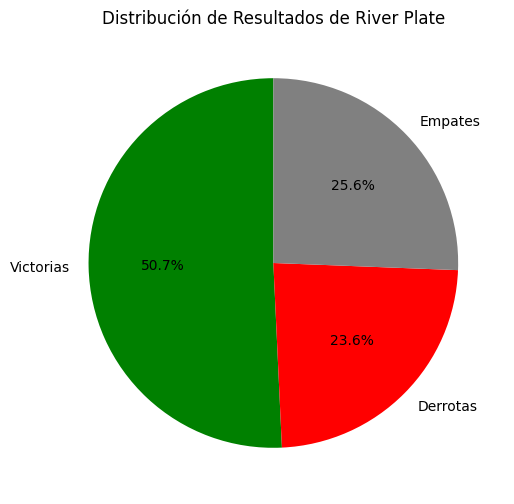

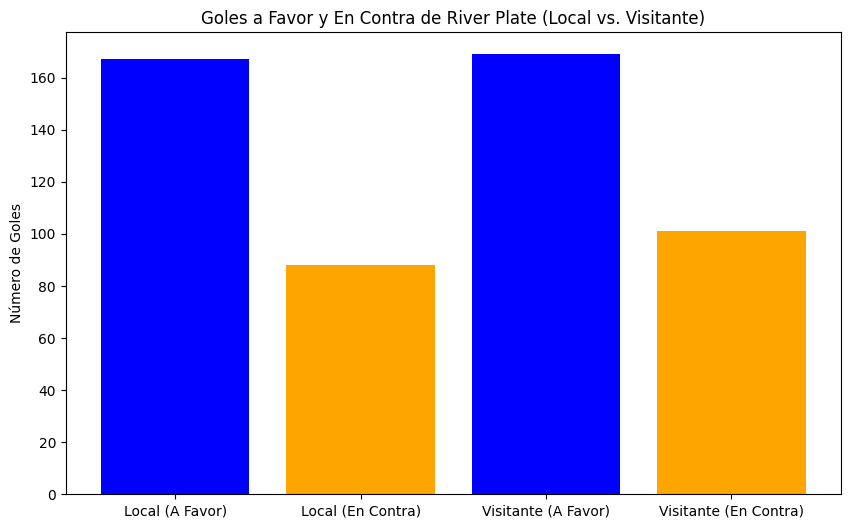

In [13]:
# Partidos de River Plate
df_river = df_resultados[(df_resultados['equipo_local'] == 'River Plate') | (df_resultados['equipo_visitante'] == 'River Plate')]

# Calculo de resultados
victorias = len(df_river[((df_river['equipo_local'] == 'River Plate') & (df_river['resultado'] == 'L')) | ((df_river['equipo_visitante'] == 'River Plate') & (df_river['resultado'] == 'V'))])
derrotas = len(df_river[((df_river['equipo_local'] == 'River Plate') & (df_river['resultado'] == 'V')) | ((df_river['equipo_visitante'] == 'River Plate') & (df_river['resultado'] == 'L'))])
empates = len(df_river[df_river['resultado'] == 'E'])

# Calculo de porcentajes
total_partidos = len(df_river)
porcentaje_victorias = (victorias / total_partidos) * 100
porcentaje_derrotas = (derrotas / total_partidos) * 100
porcentaje_empates = (empates / total_partidos) * 100

# Gráfico de torta
labels = ['Victorias', 'Derrotas', 'Empates']
sizes = [porcentaje_victorias, porcentaje_derrotas, porcentaje_empates]
colors = ['green', 'red', 'gray']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Resultados de River Plate')
plt.show()

# Calcular goles a favor y en contra
goles_favor_local = df_river[df_river['equipo_local'] == 'River Plate']['goles_local'].sum()
goles_contra_local = df_river[df_river['equipo_local'] == 'River Plate']['goles_visitante'].sum()
goles_favor_visitante = df_river[df_river['equipo_visitante'] == 'River Plate']['goles_visitante'].sum()
goles_contra_visitante = df_river[df_river['equipo_visitante'] == 'River Plate']['goles_local'].sum()

# Gráfico de barras
labels = ['Local (A Favor)', 'Local (En Contra)', 'Visitante (A Favor)', 'Visitante (En Contra)']
goles = [goles_favor_local, goles_contra_local, goles_favor_visitante, goles_contra_visitante]
plt.figure(figsize=(10, 6))
plt.bar(labels, goles, color=['blue', 'orange', 'blue', 'orange'])
plt.title('Goles a Favor y En Contra de River Plate (Local vs. Visitante)')
plt.ylabel('Número de Goles')
plt.show()

In [17]:
# Función para determinar el rival
def obtener_rival(row):
    if row['equipo_local'] == 'River Plate':
        return row['equipo_visitante']
    else:
        return row['equipo_local']

df_resultados['rival'] = df_resultados.apply(obtener_rival, axis=1)

# Filtrar los partidos de River Plate
df_river = df_resultados[(df_resultados['equipo_local'] == 'River Plate') | (df_resultados['equipo_visitante'] == 'River Plate')]

# Calcular derrotas contra cada rival
derrotas_contra_rival = df_river[((df_river['equipo_local'] == 'River Plate') & (df_river['resultado'] == 'V')) | ((df_river['equipo_visitante'] == 'River Plate') & (df_river['resultado'] == 'L'))]['rival'].value_counts()

# Calcular victorias contra cada rival
victorias_contra_rival = df_river[((df_river['equipo_local'] == 'River Plate') & (df_river['resultado'] == 'L')) | ((df_river['equipo_visitante'] == 'River Plate') & (df_river['resultado'] == 'V'))]['rival'].value_counts()

# Obtener el top 5 de derrotas
top_5_derrotas = derrotas_contra_rival.head(5)

# Obtener el top 5 de victorias
top_5_victorias = victorias_contra_rival.head(5)

print("Top 5 de rivales contra los que River Plate perdió más veces:")
for rival, cantidad in top_5_derrotas.items():
    print(f"- {rival}: {cantidad} derrotas")

print("\nTop 5 de rivales a los que River Plate les ganó más veces:")
for rival, cantidad in top_5_victorias.items():
    print(f"- {rival}: {cantidad} victorias")

Top 5 de rivales contra los que River Plate perdió más veces:
- Boca Juniors: 5 derrotas
- Colon: 4 derrotas
- Def y Justicia: 3 derrotas
- Newells: 3 derrotas
- Patronato: 3 derrotas

Top 5 de rivales a los que River Plate les ganó más veces:
- Gimnasia (LP): 6 victorias
- Racing Club: 5 victorias
- Lanus: 5 victorias
- Banfield: 5 victorias
- Aldosivi: 5 victorias


## 5 - Modelado
#### Se buscará mediante un modelo la predección del resultado de los partidos de River Plate basándose en estadísticas del partido.

In [20]:
# Inicialmente se filtran únicamente los partidos de River Plate
river_local = df_resultados[df_resultados['equipo_local'] == 'River Plate']
river_visitante = df_resultados[df_resultados['equipo_visitante'] == 'River Plate']
river = pd.concat([river_local, river_visitante])

Precisión: 0.3114754098360656
Selected Features: Index(['posesion_local', 'posesion_visitante', 'tiros_arco_visitante',
       'intentos_visitante', 'tiro_esquina_visitante'],
      dtype='object')
Mejores hiperparámetros: {'classifier__estimator__C': 1, 'classifier__estimator__penalty': 'l2'}
Mejor score: 0.4331174838112858
Precisión en el conjunto de prueba: 0.3114754098360656
              precision    recall  f1-score   support

          -1       0.22      0.10      0.13        21
           0       0.26      0.64      0.37        14
           1       0.47      0.31      0.37        26

    accuracy                           0.31        61
   macro avg       0.32      0.35      0.29        61
weighted avg       0.34      0.31      0.29        61



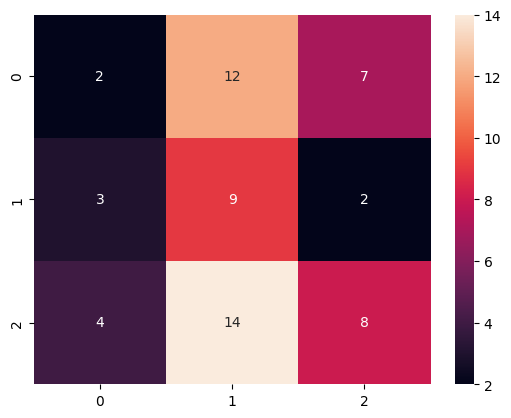

In [43]:
# Modelo 1: Regresión Logística

# Se crea la variable objetivo: si River gana, empata o pierde
def resultado_river(row):
    if row['equipo_local'] == 'River Plate':
        if row['goles_local'] > row['goles_visitante']:
            return 1  # Gana
        elif row['goles_local'] == row['goles_visitante']:
            return 0  # Empata
        else:
            return -1 # Pierde
    else: #River es visitante
        if row['goles_visitante'] > row['goles_local']:
            return 1
        elif row['goles_visitante'] == row['goles_local']:
            return 0
        else:
            return -1

river['resultado_river'] = river.apply(resultado_river, axis=1)

# Se definen las características que se usarán para predecir el resultado
features = ['posesion_local', 'tiros_arco_local', 'intentos_local', 'faltas_local', 'tiro_esquina_local',
            'posesion_visitante', 'tiros_arco_visitante', 'intentos_visitante', 'faltas_visitante', 'tiro_esquina_visitante']
X = river[features]
y = river['resultado_river']

# Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Preprocesamiento
# Se crea un pipeline para preprocesar los datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Se imputan los valores faltantes con la mediana
    ('scaler', StandardScaler())  # Se escalan los datos para que tengan la misma escala
])

# Se usa ColumnTransformer para aplicar el preprocesamiento a las columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
    ])

# Apply preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Modelado
# Se crea un pipeline para el modelo de Regresión Logística
# Removed preprocessor from the pipeline
pipeline = Pipeline(steps=[('classifier', OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42)))])

# 4. Sobremuestreo (para abordar el desequilibrio de clases)
# Se aplica SMOTE para sobremuestrear las clases minoritarias
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train) # Apply SMOTE after preprocessing

# 5. Entrenamiento
# Se entrena el modelo con los datos de entrenamiento sobremuestreados
pipeline.fit(X_train_resampled, y_train_resampled)

# 6. Predicción y Evaluación
# Se predicen los resultados en el conjunto de prueba
y_pred = pipeline.predict(X_test_processed) # Predict on processed test data

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')

# 7. Selección de Características
# Se usa SelectKBest para seleccionar las mejores características
select_k_best = SelectKBest(score_func=f_classif, k=5)  # Se seleccionan las 5 mejores características

# Aplica SelectKBest a los datos de entrenamiento sobremuestreados y transformados
X_train_selected = select_k_best.fit_transform(X_train_resampled, y_train_resampled)  # Se usan datos sobremuestreados
X_test_selected = select_k_best.transform(X_test_processed) # Transform test data

# Se obtienen los nombres de las características seleccionadas
selected_feature_indices = select_k_best.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

# 8. Ajuste de Hiperparámetros
# Se define la grilla de hiperparámetros que se va a probar
param_grid = {
    'classifier__estimator__penalty': ['l1', 'l2'],
    'classifier__estimator__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Se crea el GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Se entrena el GridSearchCV con los datos de entrenamiento sobremuestreados
grid_search.fit(X_train_resampled, y_train_resampled)  # Usar datos sobremuestreados

# Se imprimen los mejores hiperparámetros y el mejor score
print(f'Mejores hiperparámetros: {grid_search.best_params_}')
print(f'Mejor score: {grid_search.best_score_}')

# Se evalúa el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed) # Predict on processed test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba: {accuracy}')

# 9. Evaluación Final
# Se imprimen el informe de clasificación y la matriz de confusión
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Precisión: 0.4098360655737705
Selected Features: Index(['posesion_local', 'posesion_visitante', 'tiros_arco_visitante',
       'intentos_visitante', 'tiro_esquina_visitante'],
      dtype='object')
Mejores hiperparámetros: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Mejor score: 0.5632747456059205
Precisión en el conjunto de prueba: 0.4098360655737705
              precision    recall  f1-score   support

          -1       0.67      0.10      0.17        21
           0       0.27      0.57      0.36        14
           1       0.54      0.58      0.56        26

    accuracy                           0.41        61
   macro avg       0.49      0.41      0.36        61
weighted avg       0.52      0.41      0.38        61



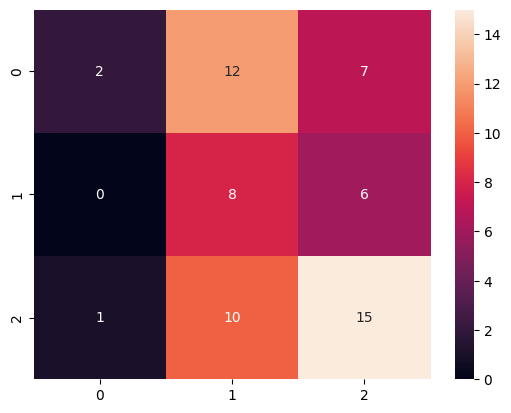

In [47]:
### Modelo 2: Random Forest

# Se crea la variable objetivo: si River gana, empata o pierde
def resultado_river(row):
    if row['equipo_local'] == 'River Plate':
        if row['goles_local'] > row['goles_visitante']:
            return 1  # Gana
        elif row['goles_local'] == row['goles_visitante']:
            return 0  # Empata
        else:
            return -1 # Pierde
    else: #River es visitante
        if row['goles_visitante'] > row['goles_local']:
            return 1
        elif row['goles_visitante'] == row['goles_local']:
            return 0
        else:
            return -1

river['resultado_river'] = river.apply(resultado_river, axis=1)

# Se definen las características que se usarán para predecir el resultado
features = ['posesion_local', 'tiros_arco_local', 'intentos_local', 'faltas_local', 'tiro_esquina_local',
            'posesion_visitante', 'tiros_arco_visitante', 'intentos_visitante', 'faltas_visitante', 'tiro_esquina_visitante']
X = river[features]
y = river['resultado_river']

# Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Preprocesamiento
# Se crea un pipeline para preprocesar los datos numéricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Se imputan los valores faltantes con la mediana
    ('scaler', StandardScaler())  # Se escalan los datos para que tengan la misma escala
])

# Se usa ColumnTransformer para aplicar el preprocesamiento a las columnas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features)
    ])

# Apply preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 3. Modelado
# Se crea un pipeline para el modelo de Random Forest
# Removed preprocessor from the pipeline
pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# 4. Sobremuestreo (para abordar el desequilibrio de clases)
# Se aplica SMOTE para sobremuestrear las clases minoritarias
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# 5. Entrenamiento
# Se entrena el modelo con los datos de entrenamiento sobremuestreados
pipeline.fit(X_train_resampled, y_train_resampled)

# 6. Predicción y Evaluación
# Se predicen los resultados en el conjunto de prueba
y_pred = pipeline.predict(X_test_processed)

# Se calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy}')

# 7. Selección de Características
# Se usa SelectKBest para seleccionar las mejores características
select_k_best = SelectKBest(score_func=f_classif, k=5)  # Se seleccionan las 5 mejores características

# Aplica SelectKBest a los datos de entrenamiento sobremuestreados y transformados
X_train_selected = select_k_best.fit_transform(X_train_resampled, y_train_resampled)  # Se usan datos sobremuestreados
X_test_selected = select_k_best.transform(X_test_processed) # Transform test data

# Se obtienen los nombres de las características seleccionadas
selected_feature_indices = select_k_best.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

# 8. Ajuste de Hiperparámetros
# Se define la grilla de hiperparámetros que se va a probar
param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Número de árboles
    'classifier__max_depth': [None, 5, 10],  # Profundidad máxima de los árboles
    'classifier__min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir un nodo
}

# Se crea el GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Se entrena el GridSearchCV con los datos de entrenamiento sobremuestreados
grid_search.fit(X_train_resampled, y_train_resampled)  # Usar datos sobremuestreados

# Se imprimen los mejores hiperparámetros y el mejor score
print(f'Mejores hiperparámetros: {grid_search.best_params_}')
print(f'Mejor score: {grid_search.best_score_}')

# Se evalúa el modelo con los mejores hiperparámetros en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed) # Predict on processed test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión en el conjunto de prueba: {accuracy}')

# 9. Evaluación Final
# Se imprimen el informe de clasificación y la matriz de confusión
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## 6 - Conclusiones

El proceso realizado buscó:
- Intentar predecir el resultado de los partidos de River Plate usando dos modelos diferentes: uno sencillo (Regresión Logística) y uno más complejo (Random Forest).
- Separar los datos para que los modelos pudieran aprender mejor.
- Elegir las estadísticas más importantes para hacer la predicción.
- Ajustar los modelos para que funcionaran lo mejor posible.
- Medir qué tan bien funcionaban los modelos.


Regresión Logística:

- El modelo de Regresión Logística no predice muy bien los resultados de los partidos de River.
- Precisión: Acierta solo en el 31% de los casos, lo cual es bastante bajo.

Random Forest:

- El modelo de Random Forest tampoco es muy bueno prediciendo los resultados de los partidos de River.
- Precisión: Acierta en el 41% de los casos, un poco mejor que la Regresión Logística, pero aún no es suficiente.


Ninguno de los dos modelos está funcionando muy bien para predecir los resultados de los partidos de River Plate. Ambos tienen dificultades para predecir cuándo River pierde, y es posible que necesitemos mejorar la calidad de los datos, agregar más información o probar otros modelos.

Los resultados obtenidos con los modelos de Regresión Logística y Random Forest sugieren que predecir los resultados de los partidos de fútbol es una tarea compleja. Tal vez el fútbol es, en gran medida, un juego de azar, donde la incertidumbre es alta y los resultados pueden ser influenciados por múltiples factores que no se capturan fácilmente en los datos, como el estado de ánimo de los jugadores, decisiones tácticas inesperadas, o incluso eventos aleatorios durante el partido. Además, existen otros factores relevantes que podrían incidir en los resultados, como la calidad individual de los jugadores, el valor total del plantel, la jerarquía del equipo, y la química entre los jugadores. Para mejorar la precisión de las predicciones, sería necesario considerar una gama más amplia de variables y explorar modelos más sofisticados que puedan capturar la complejidad inherente al juego.